In [73]:
import fitbit
import json
import configparser
import pandas as pd
import matplotlib.image
import matplotlib.pyplot as plt
%matplotlib inline

config = configparser.RawConfigParser()
config.read('config.ini')

CLIENT_ID = config.get('ACCOUNT', 'CLIENT_ID')
CLIENT_SECRET = config.get('ACCOUNT', 'CLIENT_SECRET')
ACCESS_TOKEN = config.get('ACCOUNT', 'ACCESS_TOKEN')
REPRESH_TOKEN = config.get('ACCOUNT', 'REPRESH_TOKEN')

In [74]:
authd_client = fitbit.Fitbit(CLIENT_ID, CLIENT_SECRET, access_token = ACCESS_TOKEN, refresh_token = REPRESH_TOKEN)

In [76]:
dates = pd.date_range('2017-03-14', '2017-03-27')
week_step = []

for date in dates :
    step = authd_client.intraday_time_series('activities/steps', base_date = date, detail_level = '15min')
    week_step.append(step['activities-steps'][0]['value'])
    
print(week_step)

['9106', '12642', '6377', '7451', '7968', '2299', '4032', '7865', '10060', '6281', '7112', '3198', '4834', '9009']


In [77]:
week_step = pd.DataFrame(weak_step, dates)
week_step

,0
2017-03-14,9106
2017-03-15,12642
2017-03-16,6377
2017-03-17,7451
2017-03-18,7968
2017-03-19,2299
2017-03-20,4032
2017-03-21,7865
2017-03-22,10060
2017-03-23,6281


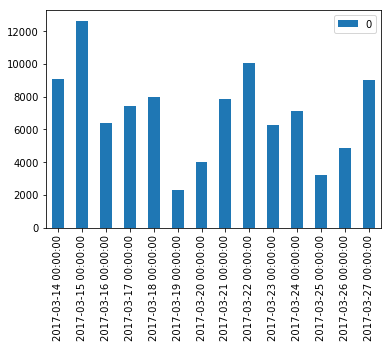

In [78]:
week_step[0] = pd.to_numeric(week_step[0]);
week_step.plot(kind = 'bar')